In [1]:
import pandas as pd

df = pd.read_csv('sample-data/Pengunjung_mall.csv')
df.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


In [2]:
df = df.rename(columns = {
    'Kelamin':'kelamin',
    'Usia' : 'usia',
    'Pendapatan (juta Rp)' : 'pendapatan',
    'Rating_pengeluaran (1-100)' : 'rate-pengeluaran'    
})

df.head()

,IDPelanggan,kelamin,usia,pendapatan,rate-pengeluaran
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


In [7]:
df['kelamin'].replace(['Laki', 'Perempuan'], [0, 1], inplace = True)
df.head()

,kelamin,pendapatan,rate-pengeluaran
0,0,15,39
1,0,15,81
2,1,16,6
3,1,16,77
4,1,17,40


In [9]:
# df = df.drop(['IDPelanggan', 'usia'], axis = 1)
df.head()

,kelamin,pendapatan,rate-pengeluaran
0,0,15,39
1,0,15,81
2,1,16,6
3,1,16,77
4,1,17,40


In [10]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(df)
    clusters.append(km.inertia_)

c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

Text(0, 0.5, 'Inertia')

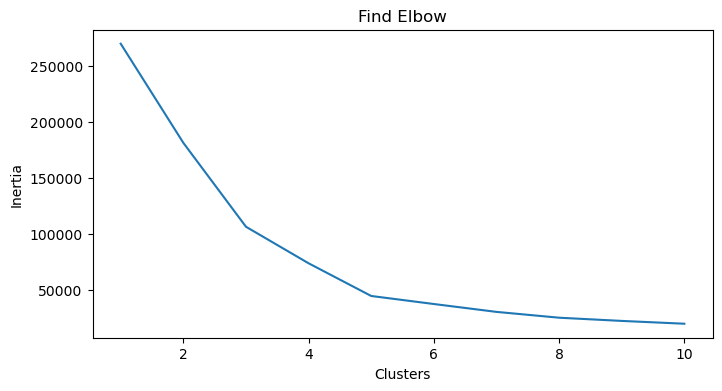

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib  inline

fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title ( 'Find Elbow' )
ax.set_xlabel ( 'Clusters' )
ax.set_ylabel ( 'Inertia' )

c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


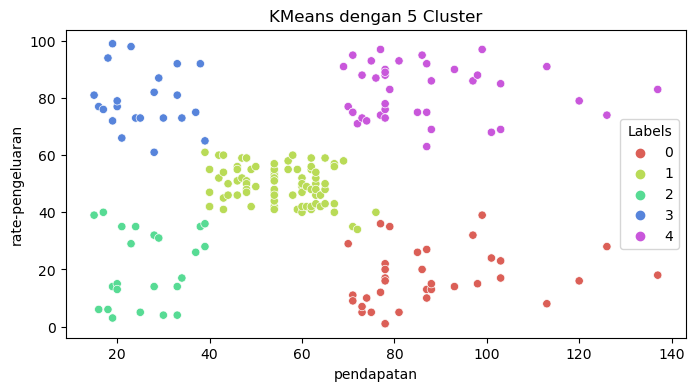

In [24]:
km5 = KMeans(n_clusters = 5).fit(df)

df['Labels'] = km5.labels_

plt.figure(figsize = (8,4))

sns.scatterplot(x = df['pendapatan'], y = df['rate-pengeluaran'], hue = df['Labels'],
                palette = sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()